<a href="https://colab.research.google.com/github/AuroraRhyf/Studi_Independent/blob/main/SN_03_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


**Memanggil Dataset**

Sebelum memanggil dataset, dataset bisa di download pada link [ini](https://drive.google.com/file/d/1zHjUJb_32DG_-xeCWoa8XQEIl4FWaw6Z/view?usp=sharing
).

Setelah dataset berhasil di download, upload file dataset pada Google Colab agar dapat digunakan. 


In [26]:
# load dataset
db = pd.read_csv("/content/diabetes_dataset.csv")

db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
db.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
#split dataset in features and target variable

x = db.iloc[:, :8] # Features
y = db.iloc[:, 8] # Target variable

In [29]:
print(x, y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [30]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


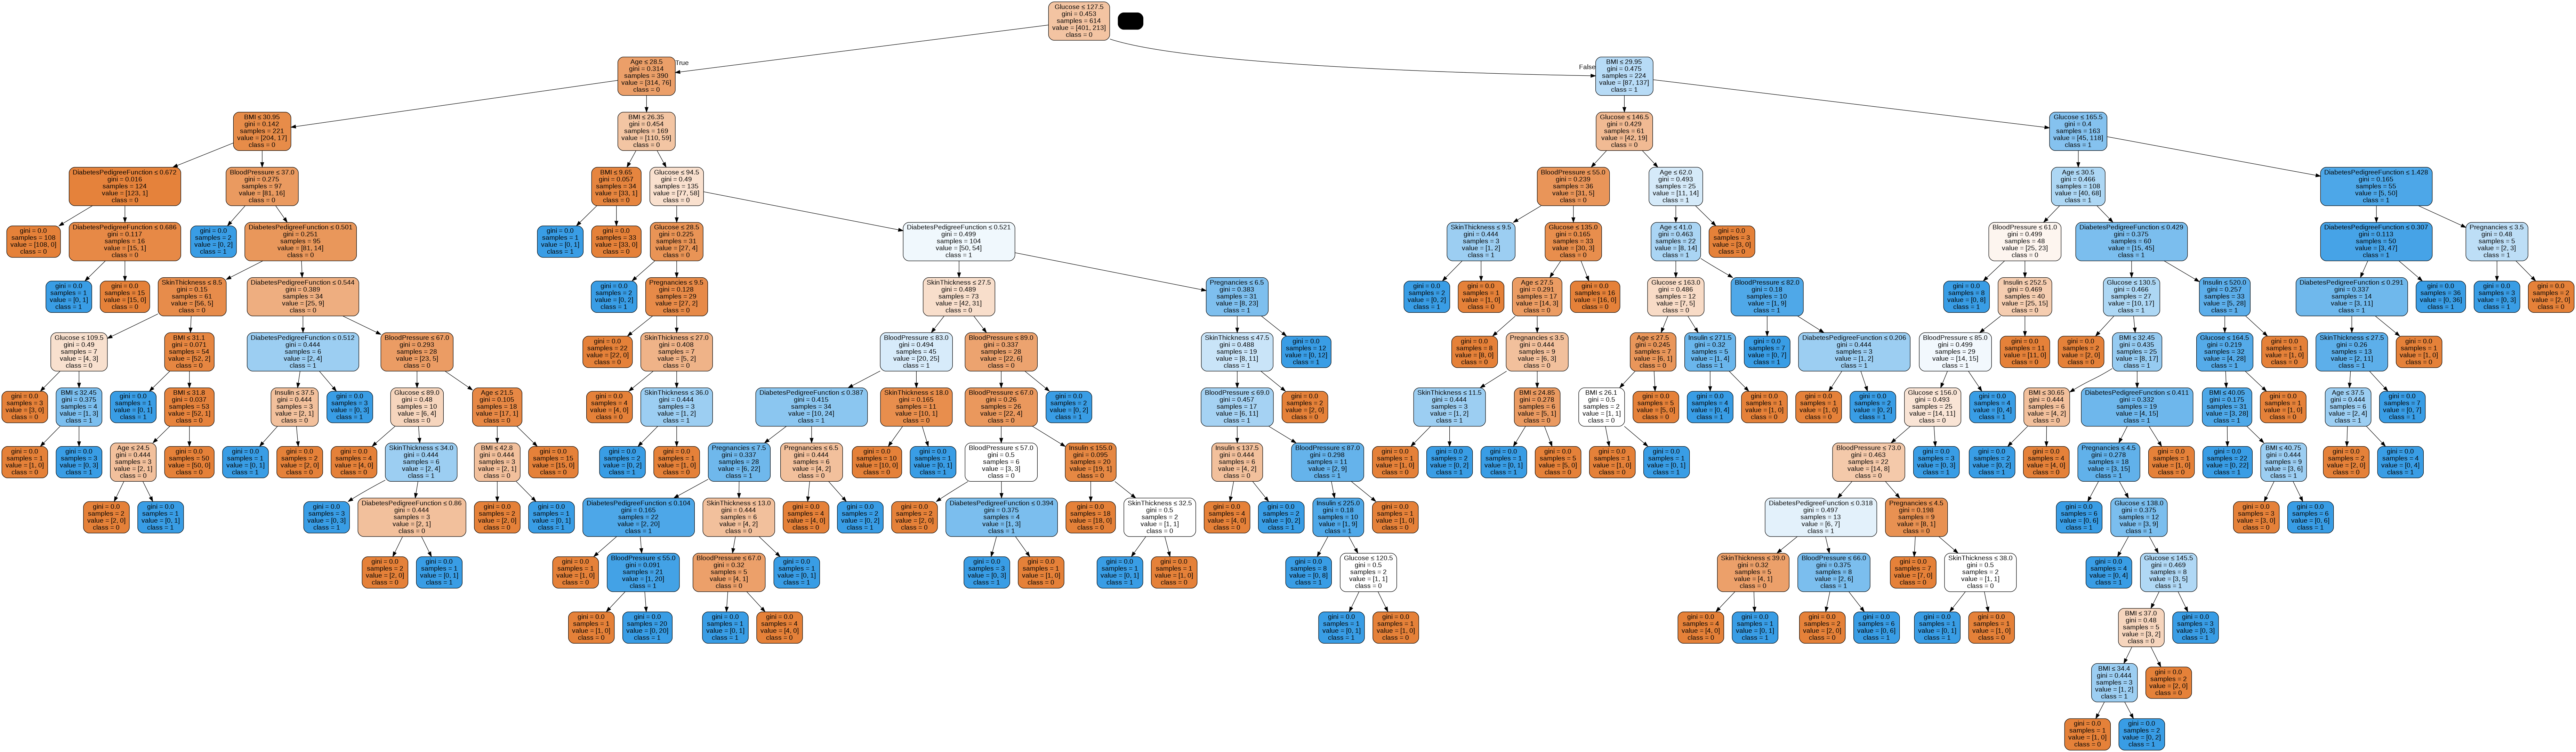

In [33]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Perhitungan skor feature apa yang paling penting

Feature: Pregnancies Score:  0.05012176929460716 %
Feature: Glucose Score:  0.3108549526245682 %
Feature: BloodPressure Score:  0.1369235199580926 %
Feature: SkinThickness Score:  0.07720103400194636 %
Feature: Insulin Score:  0.04691313486584899 %
Feature: BMI Score:  0.17549274841070628 %
Feature: DiabetesPedigreeFunction Score:  0.09825862743483524 %
Feature: Age Score:  0.10423421340939511 %


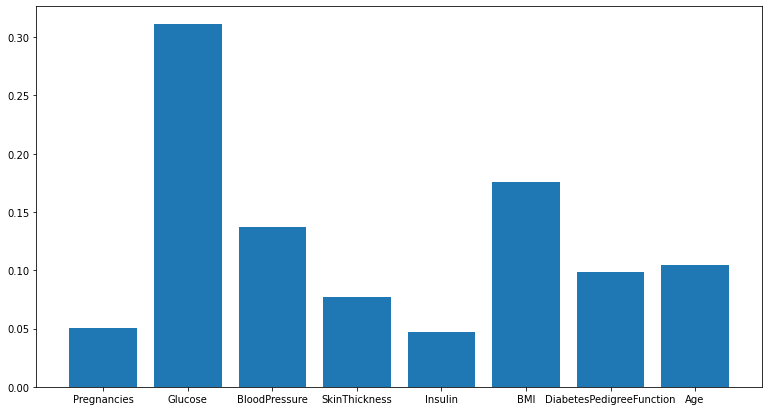

In [34]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()



---



## **Tugas**

Lakukan Klasifikasi Customer Churn dengan Decision Tree:
1. buat model dan gambar pohonnya
2. Cari feature apa yang paling penting di kasus tersebut.
3. Hitung akurasinya, bandingkan dengan hasil di KNN, mana kah model yang lebih baik untuk kasus Customer churn?

In [35]:
db = pd.read_csv("/content/churnprediction_ch9.csv", index_col=['customer_id'])

db

,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
customer_id,,,,,,,,,,,,,,
285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1


In [36]:
db.columns

Index(['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure',
       'churn'],
      dtype='object')

In [37]:
#split dataset in features and target variable

x = db.iloc[:, :13] # Features
y = db.iloc[:, 13] # Target variable

In [38]:
print(x, y)

                                  product  reload_1  reload_2    video  \
customer_id                                                              
285fae8412c4720a0c79d95f98434422  Kartu A  27734.30  24381.32  22000.0   
f45bce87ca6bf100f222fcc0db06b624  Kartu A  26433.00  26515.50      0.0   
09b54557b1e2a10d998e3473a9ccd2a0  Kartu A  93212.17  67101.83      0.0   
11f252f48be36f93dd429f2ec86cb2f5  Kartu A    183.33   1087.17      0.0   
a8df29ae9195eea348d2f74c967b978d  Kartu A  95296.67  76246.50      0.0   
...                                   ...       ...       ...      ...   
9e8b318d96caa9c0c4a50e8e59f5026c  Kartu B   1634.33  12085.33      0.0   
a310627191bdbded3905ac73e77fe319  Kartu B  30000.33  45170.67      0.0   
b6f11059e5c1df69b8c16d5c39af23dc  Kartu B   3333.33  13338.67      0.0   
88709f1defd232243f729912be696f87  Kartu B  25000.00  33333.33      0.0   
2c5bc32bc9a9c393d393bfc11c409b0d  Kartu C      0.00  11084.00      0.0   

                                    m

In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

ValueError: ignored

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

feature_cols = ['product', 'reload_1', 'reload_2', 'video', 'music', 'games', 'chat_1',
       'chat_2', 'socmed_1', 'socmed_2', 'internet', 'days_active', 'tenure']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [ ]:
import matplotlib.pyplot as plt

importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature:', feature_cols[i],'Score: ', v, '%')
# plot feature importance
plt.figure(figsize=(13,7))
plt.bar([x for x in feature_cols], importance)
plt.show()